# Importando módulos 

In [67]:
import obspy

from multiprocessing import Pool
from obspy import read,UTCDateTime,Trace
from obspy.clients.fdsn import Client
import os
import glob
import numpy as np
from collections import defaultdict
import pandas as pd
from pandas import Timestamp, date_range

from tqdm import tqdm


# Inputs e Outputs

In [39]:
FOLDER_OUTPUT = '/media/sysop/8d2362fc-3b46-49a7-a864-19b2a6ad097b/diogoloc/dados_posdoc/gliders_project/OUTPUT/'

MSEED_INPUT = "/media/sysop/8d2362fc-3b46-49a7-a864-19b2a6ad097b/diogoloc/dados_posdoc/gliders_project/OUTPUT/MSEED_LFI/"

EVENTs_DATA_FOLDER = '/home/sysop/Documents/codes_marefone/EVENT_MSEED/'

SELECT_EVENTs_DATA_FOLDER = '/home/sysop/Documents/codes_marefone/EVENT_MSEED_SEL/'

METADATA_OUTPUT = "/media/sysop/8d2362fc-3b46-49a7-a864-19b2a6ad097b/diogoloc/dados_posdoc/gliders_project/gliders_data/info_csv/metadados_glider_acustico_pmpas-bs.csv"

# Extraindo informações dos arquivos ".mseed"

In [40]:
filenames_MSEED = sorted(glob.glob(MSEED_INPUT+'*/*/*.mseed'))

In [41]:
len(filenames_MSEED)

1892563

In [42]:
lst_amar = []
for i in filenames_MSEED:
    lst_amar.append(i.split('/')[-1].split('.')[0])

In [43]:
lst_amarS = sorted(list(set(lst_amar)))

In [47]:
df_lst = []
for o in lst_amarS:
    k = [j.split('/')[-1] for j in filenames_MSEED if o in j]
    print(k[0],k[-1])

    sensor = o
    if len(k[0].split('.')) == 4:
        starttime = k[0].split('.')[2]
    
    if len(k[-1].split('.')) == 4:
        endtime = k[-1].split('.')[2]
       
    if len(k[0].split('.')) == 3:
        starttime = k[0].split('.')[1]

    if len(k[-1].split('.')) == 3:
        endtime = k[-1].split('.')[1]
    
    starttime_file = k[0]
    endtime_file = k[-1]

    df = pd.DataFrame([[sensor],[starttime_file],[endtime_file],[starttime],[endtime]], index=['sensor', 'starttime_file', 'endtime_file','starttime','endtime']).T
    df_lst.append(df)
    

AMAR021.1.20191211T150000Z.mseed AMAR021.1.20220714T084329Z.mseed
AMAR038.1.20191229T000001Z.mseed AMAR038.1.20220722T201001Z.mseed
AMAR045.1.20200102T225009Z.mseed AMAR045.1.20220729T180001Z.mseed
AMAR096.1.20191213T171001Z.mseed AMAR096.1.20200908T191001Z.mseed
AMAR115.1.20191223T110001Z.mseed AMAR115.1.20220719T192001Z.mseed
AMAR116.1.20191213T182001Z.mseed AMAR116.1.20220718T064001Z.mseed
AMAR117.1.20201011T170002Z.mseed AMAR117.1.20220719T173250Z.mseed
AMAR122.1.20191229T002001Z.mseed AMAR122.1.20220722T044001Z.mseed
AMAR146.1.20191229T000001Z.mseed AMAR146.1.20210430T184001Z.mseed
AMAR147.1.20200103T005001Z.mseed AMAR147.1.20220716T063001Z.mseed
AMAR149.1.20191213T152001Z.mseed AMAR149.1.20220718T081001Z.mseed
AMAR164.1.20191206T150001Z.mseed AMAR164.1.20220802T013001Z.mseed
AMAR165.1.20191221T100001Z.mseed AMAR165.1.20220720T035001Z.mseed
AMAR169.1.20191206T150001Z.mseed AMAR169.1.20200422T172001Z.mseed
AMAR170.20191221T100005Z.mseed AMAR170.1.20220724T015009Z.mseed
AMAR184.1.20

In [48]:
dataframe_files = pd.concat(df_lst, ignore_index=True)
dataframe_files['starttime'] = pd.to_datetime(dataframe_files.starttime, format='%Y%m%dT%H%M%SZ')
dataframe_files['endtime'] = pd.to_datetime(dataframe_files.endtime, format='%Y%m%dT%H%M%SZ')
dataframe_files.sort_values(by=['starttime','sensor'])

,sensor,starttime_file,endtime_file,starttime,endtime
11,AMAR164,AMAR164.1.20191206T150001Z.mseed,AMAR164.1.20220802T013001Z.mseed,2019-12-06 15:00:01,2022-08-02 01:30:01
13,AMAR169,AMAR169.1.20191206T150001Z.mseed,AMAR169.1.20200422T172001Z.mseed,2019-12-06 15:00:01,2020-04-22 17:20:01
16,AMAR187,AMAR187.1.20191206T150001Z.mseed,AMAR187.1.20220801T000001Z.mseed,2019-12-06 15:00:01,2022-08-01 00:00:01
0,AMAR021,AMAR021.1.20191211T150000Z.mseed,AMAR021.1.20220714T084329Z.mseed,2019-12-11 15:00:00,2022-07-14 08:43:29
15,AMAR184,AMAR184.1.20191211T150000Z.mseed,AMAR184.1.20220714T101009Z.mseed,2019-12-11 15:00:00,2022-07-14 10:10:09
10,AMAR149,AMAR149.1.20191213T152001Z.mseed,AMAR149.1.20220718T081001Z.mseed,2019-12-13 15:20:01,2022-07-18 08:10:01
3,AMAR096,AMAR096.1.20191213T171001Z.mseed,AMAR096.1.20200908T191001Z.mseed,2019-12-13 17:10:01,2020-09-08 19:10:01
5,AMAR116,AMAR116.1.20191213T182001Z.mseed,AMAR116.1.20220718T064001Z.mseed,2019-12-13 18:20:01,2022-07-18 06:40:01
12,AMAR165,AMAR165.1.20191221T100001Z.mseed,AMAR165.1.20220720T035001Z.mseed,2019-12-21 10:00:01,2022-07-20 03:50:01
14,AMAR170,AMAR170.20191221T100005Z.mseed,AMAR170.1.20220724T015009Z.mseed,2019-12-21 10:00:05,2022-07-24 01:50:09


# Dados LFI

Em cada linha, foram instalados gravadores acústicos nas profundidades de 50 m, 200 m e 950 m. 

No primeiro ciclo, foram lançadas seis linhas e no segundo, quatro linhas.

|Fundeio|Profundidade(m)|Região|
|---:|:---------|:---------------------------------|
|FA01|2.200|Impactada por atividade E&P|
|FA02|2.000|Em desenvolvimento de atividade E&P|
|FA03|2.850|Região sem atividade E&P|
|FA04|1.100|Região sem atividade E&P|
|FA05|1.100|Rota de navegação de E&P|
|FA06|1.100|Rota de navegação de E&P|





## LINHA DE FUNDEIO INSTRUMENTADA (LFI)

E.1 DESCRIÇÃO DO AMAR-G3

O equipamento AMAR-G3 (Autonomous Multichannel Acoustic Recorder) é um gravador acústico autônomo fabricado pela empresa JASCO Applied
Sciences.

O equipamento tem as seguintes características:
* Possibilidade de gravação agendada;
* Capacidade de até 1.792 GBytes de gravação;
* Até 8 canais de 24 bits com frequência de digitalização até 128
kHz;
* Um canal de 16 bits de alta velocidade, até 687,5 kHz;
* Profundidade de operação até 250m, no modo Standard e até

2.500m no modo Deep;
* Dimensões de 16,5 cm de diâmetro e 56,2 cm de altura;
* Opções de 9, 48, 96 ou 144 baterias alcalinas tamanho D;
* Tempo de gravação de até um ano;
* Ganho ajustável de O a 42 dB;
* Dez canais para medições oceanográficas.

O gravador acústico é equipado com um hidrofone modelo M14-V20-370 ou M36-V35-100, da GeoSpectrum. 

O modelo M14-V20-370 possui as seguintes características:
* Faixa de frequência: 10 Hz a 32 kHz;
* Pré-amplificação embutida de 20 dB;
* Resposta de frequência plana até 40 kHz (+/- 2 dB).

Já o modelo M36-V35-100 tem as seguintes características:
* Faixa de frequência 25 Hz a 60 kHz;
* Pré-amplificação embutida de 35 dB
* Resposta de frequência plana até 30 kHz (+/- 2 dB).

# Dados LFI[C06]

In [250]:
LFI_C6 = [

    {'name':'FA01','depth':-50,'elevation':-2200,'sensor':'AMAR038','starttime':'29-12-2019','endtime':'04-05-2020','latitude':-25.4555,'longitude':-42.8141,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    {'name':'FA01','depth':-200,'elevation':-2200,'sensor':'AMAR122','starttime':'29-12-2019','endtime':'04-05-2020','latitude':-25.4555,'longitude':-42.8141,'sampling_rate':64000,'gain':6,'hydrophone':'M36-V35-100'},
    {'name':'FA01','depth':-950,'elevation':-2200,'sensor':'AMAR146','starttime':'29-12-2019','endtime':'04-05-2020','latitude':-25.4555,'longitude':-42.8141,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-900'},
    
    {'name':'FA02','depth':-50,'elevation':-2000,'sensor':'AMAR045','starttime':'02-01-2020','endtime':'25-04-2020','latitude':-24.6559,'longitude':-42.5687,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    {'name':'FA02','depth':-950,'elevation':-2000,'sensor':'AMAR147','starttime':'03-01-2020','endtime':'30-04-2020','latitude':-24.6559,'longitude':-42.5687,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    
    {'name':'FA03','depth':-50,'elevation':-2850,'sensor':'AMAR165','starttime':'21-12-2019','endtime':'14-04-2020','latitude':-24.8940,'longitude':-40.8420,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    {'name':'FA03','depth':-200,'elevation':-2850,'sensor':'AMAR170','starttime':'21-12-2019','endtime':'14-04-2020','latitude':-24.8940,'longitude':-40.8420,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    {'name':'FA03','depth':-950,'elevation':-2850,'sensor':'AMAR115','starttime':'23-12-2019','endtime':'16-04-2020','latitude':-24.8940,'longitude':-40.8420,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-900'},
    
    {'name':'FA04','depth':-50,'elevation':-1100,'sensor':'AMAR164','starttime':'06-12-2019','endtime':'23-04-2020','latitude':-27.4960,'longitude':-46.7000,'sampling_rate':64000,'gain':6,'hydrophone':'M36-V35-100'},
    {'name':'FA04','depth':-200,'elevation':-1100,'sensor':'AMAR169','starttime':'06-12-2019','endtime':'22-04-2020','latitude':-27.4960,'longitude':-46.7000,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    {'name':'FA04','depth':-950,'elevation':-1100,'sensor':'AMAR187','starttime':'06-12-2019','endtime':'23-04-2020','latitude':-27.4960,'longitude':-46.7000,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-900'},
    
    {'name':'FA05','depth':-50,'elevation':-1100,'sensor':'AMAR149','starttime':'13-12-2019','endtime':'19-04-2020','latitude':-24.3560,'longitude':-43.1143,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    {'name':'FA05','depth':-200,'elevation':-1100,'sensor':'AMAR096','starttime':'13-12-2019','endtime':'19-04-2020','latitude':-24.3560,'longitude':-43.1143,'sampling_rate':64000,'gain':6,'hydrophone':'M36-V35-100'},
    {'name':'FA05','depth':-950,'elevation':-1100,'sensor':'AMAR116','starttime':'13-12-2019','endtime':'19-04-2020','latitude':-24.3560,'longitude':-43.1143,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-900'}, 
    
    {'name':'FA06','depth':-50,'elevation':-1100,'sensor':'AMAR021','starttime':'11-12-2019','endtime':'01-05-2020','latitude':-24.8157,'longitude':-44.1475,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-900'},
    {'name':'FA06','depth':-200,'elevation':-1100,'sensor':'AMAR184','starttime':'11-12-2019','endtime':'01-05-2020','latitude':-24.8157,'longitude':-44.1475,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-900'},
]


In [251]:
LFI_C6_info = pd.DataFrame.from_dict(LFI_C6)
LFI_C6_info

,name,depth,elevation,sensor,starttime,endtime,latitude,longitude,sampling_rate,gain,hydrophone
0,FA01,-50,-2200,AMAR038,29-12-2019,04-05-2020,-25.4555,-42.8141,64000,18,M14-V20-370
1,FA01,-200,-2200,AMAR122,29-12-2019,04-05-2020,-25.4555,-42.8141,64000,6,M36-V35-100
2,FA01,-950,-2200,AMAR146,29-12-2019,04-05-2020,-25.4555,-42.8141,64000,18,M14-V20-900
3,FA02,-50,-2000,AMAR045,02-01-2020,25-04-2020,-24.6559,-42.5687,64000,18,M14-V20-370
4,FA02,-950,-2000,AMAR147,03-01-2020,30-04-2020,-24.6559,-42.5687,64000,18,M14-V20-370
5,FA03,-50,-2850,AMAR165,21-12-2019,14-04-2020,-24.8940,-40.8420,64000,18,M14-V20-370
6,FA03,-200,-2850,AMAR170,21-12-2019,14-04-2020,-24.8940,-40.8420,64000,18,M14-V20-370
7,FA03,-950,-2850,AMAR115,23-12-2019,16-04-2020,-24.8940,-40.8420,64000,18,M14-V20-900
8,FA04,-50,-1100,AMAR164,06-12-2019,23-04-2020,-27.4960,-46.7000,64000,6,M36-V35-100
9,FA04,-200,-1100,AMAR169,06-12-2019,22-04-2020,-27.4960,-46.7000,64000,18,M14-V20-370


# Dados LFI[C07]

## ESCOPO DO SERVIÇO
As medições de ruídos hidroacústicos foram realizadas em 3 profundidades:

* Por volta de 50 metros, na camada de superfície (com o compromisso de ser afastado da agitação da superfície);
* Em torno de 200 metros (abaixo da camada da superfície);
* Entre 900 e 1000 metros (no eixo do Canal Acústico Profundo – SOFAR).

## EQUIPAMENTOS

Para a captação dos ruídos hidroacústicos, foram utilizados os hidrofones M36-V35-100 e M14-V20-370. 

A gravação desses dados é feita por um Gravador Acústico Multicanal Autônomo (Autonomous Multichannel Acoustic Recorder – AMAR). 

Equipamentos utilizados para medição e gravação de ruídos hidroacústicos. 
|Equipamento|Modelo|Fabricante|
|---|---|---|
|GAM|AMARG3A|Jasco|
|Hidrofone|M36-V35-100|Geospectrum|
|Hidrofone|M14-V35-370|Geospectrum|


## Informações pertinentes
Para mais detalhes acerca dos dados e controle de qualidade, verificar os anexos (FA-01 a FA-06). A seguir serão elencados, por linha de fundeio, eventos fora da normalidade ocorridos durante o período de operação dos sensores:

* FA-01: A linha foi lançada sem o AMAR de 1000 metros.

* FA-02: Foram constatados danos físicos no backbone e gaiola do microfone do AMAR de 1000 metros, no entanto, não houve perda de dados e foram feitos reparos nos equipamentos, que foram utilizados novamente.

* FA-03: Sem considerações.
 
* FA-04: O AMAR 169 foi recolhido alagado.

* FA-05: Sem considerações.

* FA-06: Sem considerações.

In [252]:
LFI_C7 = [
    {'name':'FA01','depth':-50,'elevation':-2199,'sensor':'AMAR038','starttime':'09-05-2020','endtime':'28-10-2020','latitude':-25.5717,'longitude':-42.6645,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    {'name':'FA01','depth':-200,'elevation':-2199,'sensor':'AMAR122','starttime':'09-05-2020','endtime':'28-10-2020','latitude':-25.5717,'longitude':-42.6645,'sampling_rate':64000,'gain':6,'hydrophone':'M36-V35-100'},
    
    {'name':'FA02','depth':-950,'elevation':-2005,'sensor':'AMAR146','starttime':'10-05-2020','endtime':'11-09-2020','latitude':-24.6827,'longitude':-42.5586,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    
    {'name':'FA03','depth':-50,'elevation':-2200,'sensor':'AMAR165','starttime':'18-04-2020','endtime':'03-11-2020','latitude':-24.2272,'longitude':-41.3050,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    {'name':'FA03','depth':-200,'elevation':-2200,'sensor':'AMAR170','starttime':'18-04-2020','endtime':'03-11-2020','latitude':-24.2272,'longitude':-41.3050,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    {'name':'FA03','depth':-950,'elevation':-2200,'sensor':'AMAR115','starttime':'18-04-2020','endtime':'03-11-2020','latitude':-24.2272,'longitude':-41.3050,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    
    {'name':'FA04','depth':-200,'elevation':-1000,'sensor':'AMAR164','starttime':'28-04-2020','endtime':'05-11-2020','latitude':-23.8855,'longitude':-41.5154,'sampling_rate':64000,'gain':6,'hydrophone':'M36-V35-100'},
    {'name':'FA04','depth':-950,'elevation':-1000,'sensor':'AMAR187','starttime':'28-04-2020','endtime':'05-11-2020','latitude':-23.8855,'longitude':-41.5154,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    
    {'name':'FA05','depth':-50,'elevation':-1122,'sensor':'AMAR149','starttime':'20-04-2020','endtime':'08-09-2020','latitude':-24.3554,'longitude':-43.1150,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    {'name':'FA05','depth':-200,'elevation':-1122,'sensor':'AMAR096','starttime':'20-04-2020','endtime':'08-09-2020','latitude':-24.3554,'longitude':-43.1150,'sampling_rate':64000,'gain':6,'hydrophone':'M36-V35-100'},
    {'name':'FA05','depth':-950,'elevation':-1122,'sensor':'AMAR116','starttime':'20-04-2020','endtime':'08-09-2020','latitude':-24.3554,'longitude':-43.1150,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'}, 
    
    {'name':'FA06','depth':-50,'elevation':-1108,'sensor':'AMAR021','starttime':'02-05-2020','endtime':'05-09-2020','latitude':-24.8180,'longitude':-44.1461,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-900'},
    {'name':'FA06','depth':-200,'elevation':-1108,'sensor':'AMAR184','starttime':'02-05-2020','endtime':'05-09-2020','latitude':-24.8180,'longitude':-44.1461,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-900'},
    {'name':'FA06','depth':-950,'elevation':-1108,'sensor':'AMAR147','starttime':'02-05-2020','endtime':'05-09-2020','latitude':-24.8180,'longitude':-44.1461,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'}
]


In [253]:
LFI_C7_info = pd.DataFrame.from_dict(LFI_C7)
LFI_C7_info

,name,depth,elevation,sensor,starttime,endtime,latitude,longitude,sampling_rate,gain,hydrophone
0,FA01,-50,-2199,AMAR038,09-05-2020,28-10-2020,-25.5717,-42.6645,64000,18,M14-V20-370
1,FA01,-200,-2199,AMAR122,09-05-2020,28-10-2020,-25.5717,-42.6645,64000,6,M36-V35-100
2,FA02,-950,-2005,AMAR146,10-05-2020,11-09-2020,-24.6827,-42.5586,64000,18,M14-V20-370
3,FA03,-50,-2200,AMAR165,18-04-2020,03-11-2020,-24.2272,-41.3050,64000,18,M14-V20-370
4,FA03,-200,-2200,AMAR170,18-04-2020,03-11-2020,-24.2272,-41.3050,64000,18,M14-V20-370
5,FA03,-950,-2200,AMAR115,18-04-2020,03-11-2020,-24.2272,-41.3050,64000,18,M14-V20-370
6,FA04,-200,-1000,AMAR164,28-04-2020,05-11-2020,-23.8855,-41.5154,64000,6,M36-V35-100
7,FA04,-950,-1000,AMAR187,28-04-2020,05-11-2020,-23.8855,-41.5154,64000,18,M14-V20-370
8,FA05,-50,-1122,AMAR149,20-04-2020,08-09-2020,-24.3554,-43.1150,64000,18,M14-V20-370
9,FA05,-200,-1122,AMAR096,20-04-2020,08-09-2020,-24.3554,-43.1150,64000,6,M36-V35-100


# Dados LFI[C08]

## EQUIPAMENTOS

Para a captação dos ruídos hidroacústicos, foram utilizados os hidrofones M36-V35-100 e M14-V20-370. 

A gravação desses dados é feita por um Gravador Acústico Multicanal Autônomo (Autonomous Multichannel Acoustic Recorder – AMAR). 

Equipamentos utilizados para medição e gravação de ruídos hidroacústicos. 
|Equipamento|Modelo|Fabricante|
|---|---|---|
|GAM|AMARG3A|Jasco|
|GAM|AMARG4|Jasco|
|Hidrofone|M36-V35-100|Geospectrum|
|Hidrofone|M14-V35-370|Geospectrum|


## Informações pertinentes
A seguir, serão elencados, por linha de fundeio, eventos fora da normalidade ocorridos durante o período de operação dos sensores.

* FA-01: Sem considerações.

* FA-02: Foram constatados danos físicos na gaiola do AMAR 045, e no backbone e gaiola do AMAR 146. Apesar dos danos, não houve perda de dados. Após reparos, os equipamentos foram utilizados novamente.

* FA-03: Sem considerações.

* FA-04: Sem considerações.

* FA-05: O dano na gaiola do AMAR 116, ocorrido desde a campanha anterior, não resultou em perda de dados. Após reparos, o equipamento foi utilizado novamente. Por outro lado, o AMAR 096 foi encontrado inundado e, portanto, não gravou dados no período esperado.

* FA-06: Foram constatados danos físicos na gaiola do AMAR 184. Além disso, o equipamento não gravou dados durante o período esperado.

Em função de os AMARs 096 e 184 não terem gravado dados durante o período para o qual este relatório é válido, omitimos as informações relativas a estes
equipamentos, exceto na tabela de medição (Tabela 8).

In [254]:
LFI_C8 = [
    {'name':'FA01','depth':-50,'elevation':-2200,'sensor':'AMAR038','starttime':'29-10-2020','endtime':'19-04-2021','latitude':-25.5895,'longitude':-42.6672,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    {'name':'FA01','depth':-200,'elevation':-2200,'sensor':'AMAR122','starttime':'29-10-2020','endtime':'19-04-2021','latitude':-25.5895,'longitude':-42.6672,'sampling_rate':64000,'gain':6,'hydrophone':'M36-V35-100'},

    {'name':'FA02','depth':-50,'elevation':-2000,'sensor':'AMAR045','starttime':'12-10-2020','endtime':'30-04-2021','latitude':-24.6827,'longitude':-42.5578,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    {'name':'FA02','depth':-200,'elevation':-2000,'sensor':'AMAR117','starttime':'12-10-2020','endtime':'30-04-2021','latitude':-24.6827,'longitude':-42.5578,'sampling_rate':64000,'gain':6,'hydrophone':'M36-V35-100'},
    {'name':'FA02','depth':-950,'elevation':-2000,'sensor':'AMAR146','starttime':'12-10-2020','endtime':'30-04-2021','latitude':-24.6827,'longitude':-42.5578,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},

    {'name':'FA03','depth':-50,'elevation':-2200,'sensor':'AMAR165','starttime':'04-11-2020','endtime':'27-04-2021','latitude':-24.2273,'longitude':-41.3051,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    {'name':'FA03','depth':-200,'elevation':-2200,'sensor':'AMAR170','starttime':'04-11-2020','endtime':'27-04-2021','latitude':-24.2273,'longitude':-41.3051,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    {'name':'FA03','depth':-950,'elevation':-2200,'sensor':'AMAR115','starttime':'04-11-2020','endtime':'27-04-2021','latitude':-24.2273,'longitude':-41.3051,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},

    {'name':'FA04','depth':-200,'elevation':-1100,'sensor':'AMAR164','starttime':'06-11-2020','endtime':'05-04-2021','latitude':-23.8909,'longitude':-41.5091,'sampling_rate':64000,'gain':6,'hydrophone':'M36-V35-100'},
    {'name':'FA04','depth':-950,'elevation':-1100,'sensor':'AMAR187','starttime':'06-11-2020','endtime':'05-04-2021','latitude':-23.8909,'longitude':-41.5091,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},

    {'name':'FA05','depth':-50,'elevation':-1100,'sensor':'AMAR149','starttime':'09-09-2020','endtime':'31-03-2021','latitude':-24.3543,'longitude':-43.1090,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    {'name':'FA05','depth':-950,'elevation':-1100,'sensor':'AMAR116','starttime':'09-09-2020','endtime':'31-03-2021','latitude':-24.3543,'longitude':-43.1090,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},

    {'name':'FA06','depth':-50,'elevation':-1100,'sensor':'AMAR021','starttime':'07-09-2020','endtime':'10-04-2021','latitude':-24.8141,'longitude':-44.1470,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-900'},
    {'name':'FA06','depth':-950,'elevation':-1100,'sensor':'AMAR147','starttime':'07-09-2020','endtime':'10-04-2021','latitude':-24.8141,'longitude':-44.1470,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'}
]

In [255]:
LFI_C8_info = pd.DataFrame.from_dict(LFI_C8)
LFI_C8_info

,name,depth,elevation,sensor,starttime,endtime,latitude,longitude,sampling_rate,gain,hydrophone
0,FA01,-50,-2200,AMAR038,29-10-2020,19-04-2021,-25.5895,-42.6672,64000,18,M14-V20-370
1,FA01,-200,-2200,AMAR122,29-10-2020,19-04-2021,-25.5895,-42.6672,64000,6,M36-V35-100
2,FA02,-50,-2000,AMAR045,12-10-2020,30-04-2021,-24.6827,-42.5578,64000,18,M14-V20-370
3,FA02,-200,-2000,AMAR117,12-10-2020,30-04-2021,-24.6827,-42.5578,64000,6,M36-V35-100
4,FA02,-950,-2000,AMAR146,12-10-2020,30-04-2021,-24.6827,-42.5578,64000,18,M14-V20-370
5,FA03,-50,-2200,AMAR165,04-11-2020,27-04-2021,-24.2273,-41.3051,64000,18,M14-V20-370
6,FA03,-200,-2200,AMAR170,04-11-2020,27-04-2021,-24.2273,-41.3051,64000,18,M14-V20-370
7,FA03,-950,-2200,AMAR115,04-11-2020,27-04-2021,-24.2273,-41.3051,64000,18,M14-V20-370
8,FA04,-200,-1100,AMAR164,06-11-2020,05-04-2021,-23.8909,-41.5091,64000,6,M36-V35-100
9,FA04,-950,-1100,AMAR187,06-11-2020,05-04-2021,-23.8909,-41.5091,64000,18,M14-V20-370


# Dados LFI[C09]

## Informações pertinentes
A seguir, serão elencados, por linha de fundeio, eventos fora da normalidade ocorridos durante o período de operação dos sensores.

* FA-01: O AMAR 887, instalado a 1000 m, parou de coletar dados no dia 05/09/2021 às 18:04 UTC.
* FA-02: O AMAR 146, instalado a 1000 m, foi recolhido alagado e, portanto, os dados deste equipamento não serão apresentados.
* FA-04: Na cota de 200 m, não foi instalado AMAR.
* FA-05: Na cota de 200 m, não foi instalado AMAR.
* FA-06: Os dados coletados pelos AMARs 021 e 184, instalados nas profundidades 73 e 206 m, foram desconsiderados a partir das 16 UTC do dia 21/08/2021, devido ao rompimento da linha.

In [256]:
LFI_C9 = [
    {'name':'FA01','depth':-50,'elevation':-2200,'sensor':'AMAR038','starttime':'26-04-2021','endtime':'06-12-2021','latitude':-25.59193,'longitude':-42.66453,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    {'name':'FA01','depth':-200,'elevation':-2200,'sensor':'AMAR122','starttime':'26-04-2021','endtime':'06-12-2021','latitude':-25.59193,'longitude':-42.66453,'sampling_rate':64000,'gain':6,'hydrophone':'M36-V35-100'},
    {'name':'FA01','depth':-950,'elevation':-2200,'sensor':'AMAR887','starttime':'26-04-2021','endtime':'06-12-2021','latitude':-25.59193,'longitude':-42.66453,'sampling_rate':64000,'gain':6,'hydrophone':'M36-V35-100'},
    
    {'name':'FA02','depth':-50,'elevation':-2000,'sensor':'AMAR045','starttime':'01-05-2021','endtime':'13-12-2021','latitude':-24.6831,'longitude':-42.5571,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    {'name':'FA02','depth':-200,'elevation':-2000,'sensor':'AMAR117','starttime':'01-05-2021','endtime':'13-12-2021','latitude':-24.6831,'longitude':-42.5571,'sampling_rate':64000,'gain':6,'hydrophone':'M36-V35-100'},
    {'name':'FA02','depth':-950,'elevation':-2000,'sensor':'AMAR146','starttime':'01-05-2021','endtime':'13-12-2021','latitude':-24.6831,'longitude':-42.5571,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    
    {'name':'FA03','depth':-50,'elevation':-2200,'sensor':'AMAR170','starttime':'28-04-2021','endtime':'04-12-2021','latitude':-24.2268,'longitude':-41.3041,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    {'name':'FA03','depth':-200,'elevation':-2200,'sensor':'AMAR115','starttime':'28-04-2021','endtime':'04-12-2021','latitude':-24.2268,'longitude':-41.3041,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    {'name':'FA03','depth':-950,'elevation':-2200,'sensor':'AMAR165','starttime':'28-04-2021','endtime':'04-12-2021','latitude':-24.2268,'longitude':-41.3041,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    
    {'name':'FA04','depth':-200,'elevation':-1100,'sensor':'AMAR164','starttime':'07-04-2021','endtime':'17-12-2021','latitude':-27.4961,'longitude':-46.699,'sampling_rate':64000,'gain':6,'hydrophone':'M36-V35-100'},
    {'name':'FA04','depth':-950,'elevation':-1100,'sensor':'AMAR187','starttime':'07-04-2021','endtime':'17-12-2021','latitude':-27.4961,'longitude':-46.699,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    
    {'name':'FA05','depth':-50,'elevation':-1100,'sensor':'AMAR149','starttime':'04-04-2021','endtime':'02-12-2021','latitude':-24.3553,'longitude':-43.1144,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    {'name':'FA05','depth':-950,'elevation':-1100,'sensor':'AMAR116','starttime':'04-04-2021','endtime':'02-12-2021','latitude':-24.3553,'longitude':-43.1144,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    
    {'name':'FA06','depth':-50,'elevation':-1100,'sensor':'AMAR021','starttime':'15-04-2021','endtime':'28-11-2021','latitude':-24.8162,'longitude':-44.1483,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-900'},
    {'name':'FA06','depth':-200,'elevation':-1100,'sensor':'AMAR184','starttime':'15-04-2021','endtime':'28-11-2021','latitude':-24.8162,'longitude':-44.1483,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-900'},
    {'name':'FA06','depth':-950,'elevation':-1100,'sensor':'AMAR147','starttime':'15-04-2021','endtime':'28-11-2021','latitude':-24.8162,'longitude':-44.1483,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'}
]

In [257]:
LFI_C9_info = pd.DataFrame.from_dict(LFI_C9)
LFI_C9_info

,name,depth,elevation,sensor,starttime,endtime,latitude,longitude,sampling_rate,gain,hydrophone
0,FA01,-50,-2200,AMAR038,26-04-2021,06-12-2021,-25.59193,-42.66453,64000,18,M14-V20-370
1,FA01,-200,-2200,AMAR122,26-04-2021,06-12-2021,-25.59193,-42.66453,64000,6,M36-V35-100
2,FA01,-950,-2200,AMAR887,26-04-2021,06-12-2021,-25.59193,-42.66453,64000,6,M36-V35-100
3,FA02,-50,-2000,AMAR045,01-05-2021,13-12-2021,-24.68310,-42.55710,64000,18,M14-V20-370
4,FA02,-200,-2000,AMAR117,01-05-2021,13-12-2021,-24.68310,-42.55710,64000,6,M36-V35-100
5,FA02,-950,-2000,AMAR146,01-05-2021,13-12-2021,-24.68310,-42.55710,64000,18,M14-V20-370
6,FA03,-50,-2200,AMAR170,28-04-2021,04-12-2021,-24.22680,-41.30410,64000,18,M14-V20-370
7,FA03,-200,-2200,AMAR115,28-04-2021,04-12-2021,-24.22680,-41.30410,64000,18,M14-V20-370
8,FA03,-950,-2200,AMAR165,28-04-2021,04-12-2021,-24.22680,-41.30410,64000,18,M14-V20-370
9,FA04,-200,-1100,AMAR164,07-04-2021,17-12-2021,-27.49610,-46.69900,64000,6,M36-V35-100


# Dados LFI[C10]

## Informações pertinentes
A seguir, serão elencados, por linha de fundeio, eventos fora da normalidade ocorridos durante o período de operação dos sensores.

* FA-01: Os GAMs SN 038, 122 e 887 pararam de coletar dados nos dias 22/07/2022 às 20:10 UTC, 22/07/2022 às 04:40 UTC e 10/12/2021 às 12:40 UTC, respectivamente.
* FA-02: Não foi instalado GAM na cota de 50 m. Os GAMs SN 045 e 117 pararam de coletar dados nos dias 29/07/2022 às 18:00 UTC e 19/07/2022 às 17:32 UTC, respectivamente.
* FA-03: Os GAMs SN 115, 165 e 170 pararam de coletar dados nos dias 19/07/2022 às 19:20 UTC, 20/07/2022 às 03:50 UTC e 24/07/2022 às 01:50 UTC, respectivamente.
* FA-04: Não foi instalado GAM na cota de 50 m. Os GAMs SN 164 e 187 pararam de coletar dados nos dias 02/08/2022 às 01:30 UTC e 01/08/2022 às 00:00 UTC, respectivamente.
* FA-05: Não foi instalado GAM na cota de 200 m. Os GAMs SN 116 e 149 pararam de coletar dados no dia 18/07/2022, às 06:40 UTC e às 08:10 UTC, respectivamente.
* FA-06: Os GAMs SN 021, 147 e 184 pararam de coletar dados nos dias 14/07/2022 às 08:43 UTC, 16/07/2022 às 06:30 UTC e 14/07/2022 às 10:10 UTC, respectivamente.

In [258]:
LFI_C10 = [
    {'name':'FA01','depth':-50,'elevation':-2200,'sensor':'AMAR038','starttime':'08-12-2021','endtime':'23-08-2022','latitude':-25.5903,'longitude':-42.6555,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    {'name':'FA01','depth':-200,'elevation':-2200,'sensor':'AMAR122','starttime':'08-12-2021','endtime':'23-08-2022','latitude':-25.5903,'longitude':-42.6555,'sampling_rate':64000,'gain':6,'hydrophone':'M36-V35-100'},
    {'name':'FA01','depth':-950,'elevation':-2200,'sensor':'AMAR887','starttime':'08-12-2021','endtime':'23-08-2022','latitude':-25.5903,'longitude':-42.6555,'sampling_rate':64000,'gain':6,'hydrophone':'M36-V35-100'},

    {'name':'FA02','depth':-200,'elevation':-2000,'sensor':'AMAR045','starttime':'14-12-2021','endtime':'25-08-2022','latitude':-24.6827,'longitude':-42.5570,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    {'name':'FA02','depth':-950,'elevation':-2000,'sensor':'AMAR117','starttime':'14-12-2021','endtime':'25-08-2022','latitude':-24.6827,'longitude':-42.5570,'sampling_rate':64000,'gain':6,'hydrophone':'M36-V35-100'},

    {'name':'FA03','depth':-50,'elevation':-2200,'sensor':'AMAR165','starttime':'05-12-2021','endtime':'01-08-2022','latitude':-24.2262,'longitude':-41.3053,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    {'name':'FA03','depth':-200,'elevation':-2200,'sensor':'AMAR170','starttime':'05-12-2021','endtime':'01-08-2022','latitude':-24.2262,'longitude':-41.3053,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    {'name':'FA03','depth':-950,'elevation':-2200,'sensor':'AMAR115','starttime':'05-12-2021','endtime':'01-08-2022','latitude':-24.2262,'longitude':-41.3053,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},

    {'name':'FA04','depth':-200,'elevation':-1100,'sensor':'AMAR164','starttime':'17-12-2021','endtime':'06-08-2022','latitude':-27.4965,'longitude':-46.7005,'sampling_rate':64000,'gain':6,'hydrophone':'M36-V35-100'},
    {'name':'FA04','depth':-950,'elevation':-1100,'sensor':'AMAR187','starttime':'17-12-2021','endtime':'06-08-2022','latitude':-27.4965,'longitude':-46.7005,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},

    {'name':'FA05','depth':-50,'elevation':-1100,'sensor':'AMAR149','starttime':'03-12-2021','endtime':'03-08-2022','latitude':-24.3558,'longitude':-43.1136,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},
    {'name':'FA05','depth':-950,'elevation':-1100,'sensor':'AMAR116','starttime':'03-12-2021','endtime':'03-08-2022','latitude':-24.3558,'longitude':-43.1136,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'},

    {'name':'FA06','depth':-50,'elevation':-1100,'sensor':'AMAR021','starttime':'01-12-2021','endtime':'17-07-2022','latitude':-24.8160,'longitude':-44.1475,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-900'},
    {'name':'FA06','depth':-200,'elevation':-1100,'sensor':'AMAR184','starttime':'01-12-2021','endtime':'17-07-2022','latitude':-24.8160,'longitude':-44.1475,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-900'},
    {'name':'FA06','depth':-950,'elevation':-1100,'sensor':'AMAR147','starttime':'01-12-2021','endtime':'17-07-2022','latitude':-24.8160,'longitude':-44.1475,'sampling_rate':64000,'gain':18,'hydrophone':'M14-V20-370'}
]

In [259]:
LFI_C10_info = pd.DataFrame.from_dict(LFI_C10)
LFI_C10_info

,name,depth,elevation,sensor,starttime,endtime,latitude,longitude,sampling_rate,gain,hydrophone
0,FA01,-50,-2200,AMAR038,08-12-2021,23-08-2022,-25.5903,-42.6555,64000,18,M14-V20-370
1,FA01,-200,-2200,AMAR122,08-12-2021,23-08-2022,-25.5903,-42.6555,64000,6,M36-V35-100
2,FA01,-950,-2200,AMAR887,08-12-2021,23-08-2022,-25.5903,-42.6555,64000,6,M36-V35-100
3,FA02,-200,-2000,AMAR045,14-12-2021,25-08-2022,-24.6827,-42.5570,64000,18,M14-V20-370
4,FA02,-950,-2000,AMAR117,14-12-2021,25-08-2022,-24.6827,-42.5570,64000,6,M36-V35-100
5,FA03,-50,-2200,AMAR165,05-12-2021,01-08-2022,-24.2262,-41.3053,64000,18,M14-V20-370
6,FA03,-200,-2200,AMAR170,05-12-2021,01-08-2022,-24.2262,-41.3053,64000,18,M14-V20-370
7,FA03,-950,-2200,AMAR115,05-12-2021,01-08-2022,-24.2262,-41.3053,64000,18,M14-V20-370
8,FA04,-200,-1100,AMAR164,17-12-2021,06-08-2022,-27.4965,-46.7005,64000,6,M36-V35-100
9,FA04,-950,-1100,AMAR187,17-12-2021,06-08-2022,-27.4965,-46.7005,64000,18,M14-V20-370


# Merging data

In [260]:
LF_lst = [LFI_C6_info,LFI_C7_info,LFI_C8_info,LFI_C9_info,LFI_C10_info]

In [261]:
df_LF = pd.concat(LF_lst, ignore_index=True)

df_LF


,name,depth,elevation,sensor,starttime,endtime,latitude,longitude,sampling_rate,gain,hydrophone
0,FA01,-50,-2200,AMAR038,29-12-2019,04-05-2020,-25.4555,-42.8141,64000,18,M14-V20-370
1,FA01,-200,-2200,AMAR122,29-12-2019,04-05-2020,-25.4555,-42.8141,64000,6,M36-V35-100
2,FA01,-950,-2200,AMAR146,29-12-2019,04-05-2020,-25.4555,-42.8141,64000,18,M14-V20-900
3,FA02,-50,-2000,AMAR045,02-01-2020,25-04-2020,-24.6559,-42.5687,64000,18,M14-V20-370
4,FA02,-950,-2000,AMAR147,03-01-2020,30-04-2020,-24.6559,-42.5687,64000,18,M14-V20-370
...,...,...,...,...,...,...,...,...,...,...,...
70,FA05,-50,-1100,AMAR149,03-12-2021,03-08-2022,-24.3558,-43.1136,64000,18,M14-V20-370
71,FA05,-950,-1100,AMAR116,03-12-2021,03-08-2022,-24.3558,-43.1136,64000,18,M14-V20-370
72,FA06,-50,-1100,AMAR021,01-12-2021,17-07-2022,-24.8160,-44.1475,64000,18,M14-V20-900
73,FA06,-200,-1100,AMAR184,01-12-2021,17-07-2022,-24.8160,-44.1475,64000,18,M14-V20-900


In [262]:
def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot))

In [263]:
def convert_36(line):
       
    datex = UTCDateTime.strptime(line['starttime'],format='%d-%m-%Y').timestamp

    # date range between 2015-2030 quatrimesters:
    date_range = [i.timestamp() for i in pd.date_range(start='01/01/2015', end='31/12/2030', freq='4M')]
    
    # hexatrigesimal two digit number for each quatrimester:
    hexatri_lst = [str(np.base_repr(y, 36)).zfill(2) for y in range(len(date_range))]

    if line['depth'] == -50:
        #find the nearest date and append the 2-hexatrigesimal-digit:
        return line['name'][0]+line['name'][-1]+hexatri_lst[date_range.index(nearest(date_range,datex))]+'A'
    
    if line['depth'] == -200:
        #find the nearest date and append the 2-hexatrigesimal-digit:
       return line['name'][0]+line['name'][-1]+hexatri_lst[date_range.index(nearest(date_range,datex))]+'B'

    if line['depth'] == -950:
        #find the nearest date and append the 2-hexatrigesimal-digit:
        return line['name'][0]+line['name'][-1]+hexatri_lst[date_range.index(nearest(date_range,datex))]+'C'


In [264]:
df_LF['nettab_name'] = df_LF.apply(convert_36,axis=1)

In [270]:
df_LF['date_nettab'] = df_mergulho_feather['time'].dt.strftime('%Y/%j:%H%M')

,name,depth,elevation,sensor,starttime,endtime,latitude,longitude,sampling_rate,gain,hydrophone,nettab_name
0,FA01,-50,-2200,AMAR038,29-12-2019,04-05-2020,-25.4555,-42.8141,64000,18,M14-V20-370,F10FA
1,FA01,-200,-2200,AMAR122,29-12-2019,04-05-2020,-25.4555,-42.8141,64000,6,M36-V35-100,F10FB
2,FA01,-950,-2200,AMAR146,29-12-2019,04-05-2020,-25.4555,-42.8141,64000,18,M14-V20-900,F10FC
3,FA02,-50,-2000,AMAR045,02-01-2020,25-04-2020,-24.6559,-42.5687,64000,18,M14-V20-370,F20FA
4,FA02,-950,-2000,AMAR147,03-01-2020,30-04-2020,-24.6559,-42.5687,64000,18,M14-V20-370,F20FC
...,...,...,...,...,...,...,...,...,...,...,...,...
70,FA05,-50,-1100,AMAR149,03-12-2021,03-08-2022,-24.3558,-43.1136,64000,18,M14-V20-370,F50LA
71,FA05,-950,-1100,AMAR116,03-12-2021,03-08-2022,-24.3558,-43.1136,64000,18,M14-V20-370,F50LC
72,FA06,-50,-1100,AMAR021,01-12-2021,17-07-2022,-24.8160,-44.1475,64000,18,M14-V20-900,F60LA
73,FA06,-200,-1100,AMAR184,01-12-2021,17-07-2022,-24.8160,-44.1475,64000,18,M14-V20-900,F60LB


In [272]:
df_LF['starttime'] = pd.to_datetime(df_LF.starttime, format='%d-%m-%Y')
df_LF['endtime'] = pd.to_datetime(df_LF.endtime, format='%d-%m-%Y')

In [280]:
df_LF['date_start_nettab'] = df_LF.starttime.dt.strftime('%Y/%j')
df_LF['date_end_nettab'] = df_LF.endtime.dt.strftime('%Y/%j')

In [296]:
lines_nettab = []
for i in df_LF.iterrows():
    # Station lines (one line per station/sensor/epoch) # code description datalogger%sn seismometer%sn # sampling orientation lat. lon. elev. depth. start end
    #Sl: UNAP "Uni-Iquique/Chile"   DM24%A1383 CMG-3ESP/60%T34622 100 ZNE -20.24393 -70.14041 0.0    0.0 2009/134 
    print('Sl: '+i[1].nettab_name+' "LFI:'+i[1]['name']+'" AMARG3A'+' '+i[1].hydrophone+' 100 Z '+str(i[1].latitude)+' '+str(i[1].longitude)+' '+str(i[1].depth)+' 0.0 '+i[1].date_start_nettab+' '+i[1].date_end_nettab)   
    #lines_nettab.append('Sl: '+i[1].nettab_name+' LFI:'+i[1].name+' AMARG3A'+' '+i[1].hydrophone+' 100 Z '+str(i[1].latitude)+' '+str(i[1].longitude)+' '+str(i[1].depth)+' 0.0 '+i[1].date_start_nettab+' '+i[1].date_end_nettab)

Sl: F10FA "LFI:FA01" AMARG3A M14-V20-370 100 Z -25.4555 -42.8141 -50 0.0 2019/363 2020/125
Sl: F10FB "LFI:FA01" AMARG3A M36-V35-100 100 Z -25.4555 -42.8141 -200 0.0 2019/363 2020/125
Sl: F10FC "LFI:FA01" AMARG3A M14-V20-900 100 Z -25.4555 -42.8141 -950 0.0 2019/363 2020/125
Sl: F20FA "LFI:FA02" AMARG3A M14-V20-370 100 Z -24.6559 -42.5687 -50 0.0 2020/002 2020/116
Sl: F20FC "LFI:FA02" AMARG3A M14-V20-370 100 Z -24.6559 -42.5687 -950 0.0 2020/003 2020/121
Sl: F30FA "LFI:FA03" AMARG3A M14-V20-370 100 Z -24.894 -40.842 -50 0.0 2019/355 2020/105
Sl: F30FB "LFI:FA03" AMARG3A M14-V20-370 100 Z -24.894 -40.842 -200 0.0 2019/355 2020/105
Sl: F30FC "LFI:FA03" AMARG3A M14-V20-900 100 Z -24.894 -40.842 -950 0.0 2019/357 2020/107
Sl: F40FA "LFI:FA04" AMARG3A M36-V35-100 100 Z -27.496 -46.7 -50 0.0 2019/340 2020/114
Sl: F40FB "LFI:FA04" AMARG3A M14-V20-370 100 Z -27.496 -46.7 -200 0.0 2019/340 2020/113
Sl: F40FC "LFI:FA04" AMARG3A M14-V20-900 100 Z -27.496 -46.7 -950 0.0 2019/340 2020/114
Sl: F50FA 

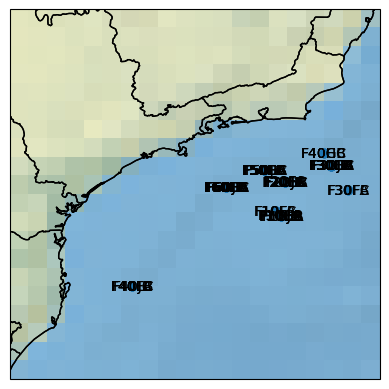

In [268]:
from matplotlib.offsetbox import AnchoredText
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-50, -40, -30, -20], crs=ccrs.PlateCarree())

# Put a background image on for nice sea rendering.
ax.stock_img()

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

    
ax.scatter(df_LF['longitude'],df_LF['latitude'],transform=ccrs.PlateCarree()) #yc, xc -- lists or numpy arrays
for i in df_LF.iterrows():
    ax.text(i[1]['longitude'],i[1]['latitude'],i[1]['nettab_name'],color="k", fontsize=10,horizontalalignment="center", verticalalignment="center",transform=ccrs.Geodetic()) ## Important